In [2]:
#import ising_lib
# from imp import reload 
# reload(ising_lib)
from ising_lib import *
from numpy import *
from matplotlib import pyplot as plt
%matplotlib inline

def variance(X):
    return var(X)
def Average(X):
    return average(X)

### Reading data fnames from resampled file list

In [68]:
# tag_name='n64_rg_sbf_folded'
tag_name='n128_rg_sbf_folded'
BASE_FOLDER='../simulation_data/resampled/'+tag_name+'/'
f=open(BASE_FOLDER+"Mfnames.txt",'r')
fnames=[]
l=f.readline()
while l:
    fnames.append(BASE_FOLDER+l[:-1])
    l=f.readline()
f.close()
print("Files to be analyzed : " ,len(fnames))

Files to be analyzed :  110


In [8]:
def get_data_moments(fname):
    f=open(fname,'r')
    l=f.readline()
    dat={'params':dict(),'list':[]}
    while l[0]=='#':
        item=l[1:-1].split(",")
        try:
            dat['params'].update({item[0]:float(item[1])})
        except:
            dat['params'].update({item[0]:item[1]})
        l=f.readline()

    item=l[:-1].split(",")
    dat.update({i:[] for i in item})
    dat['list']=[i for i in item]
    l=f.readline()
    while l:
        it=l[:-1].split(",")
        for i,j in zip(item,it):
            dat[i].append(float(j))
        l=f.readline()
    return dat

### Extracting cumulants

In [69]:
f=open('../extracted_data/'+tag_name+"_cumulants",'w')
# f=open('junk','w')
cumulant=[]
# dat=get_data_moments(fnames[0])
MAG_TYPE='My'
f.write("K,RGL")
f.write(",C4,C4_err")
# f.write(",C6,C6_err")
f.write("\n")
Len=len(fnames)
i=0
for fn in fnames:
    i+=1
#     if i>1:
#         break
#     fn=fn.replace(".Rtxt",".txt")
    dat=get_data_moments(fn)
    rgc=dat['params']['RG ']
#     L=dat['params']['L ']
    L=int(fnames[0].split('/')[-1].split('_')[1])
    T=dat['params']['T ']
    J=dat['params']['J ']
    h4=dat['params']['h4 ']
    h8=dat['params']['h8 ']
    print(" Doing ",i," / ",Len ,"L : ",L,", T : ",T," J : ",J," h4 : ",h4," h8 : ",h8)
    f.write(str(dat['params']['J '])+","+str(dat['params']['RG '])+",")
    cumulant.clear()
    for s2,s4 in zip(dat[MAG_TYPE+'_s2'],dat[MAG_TYPE+'_s4']):
        cumulant.append(1-s4*L**2/(3*rgc**2*(s2**2)))
#         cumulant.append(1-s4/(3*(s2**2)))
    c,c_err=jacknife(cumulant,Average)
    print("cumulant : ",c,"  +/- ",c_err,"   rgc : ",rgc)
    f.write(str(c)+","+str(c_err)+",")
    cumulant.clear()
#     for s2,s4,s6 in zip(dat[MAG_TYPE+'_s2'],dat[MAG_TYPE+'_s4'],dat[MAG_TYPE+'_s6']):
#         cumulant.append(1-s4/(2*s2**2) +s6/(30*s2**3))
#     c,c_err=jacknife(cumulant,Average)
#     print("cumulant : ",c,"  +/- ",c_err,"\n")
#     f.write(str(c)+","+str(c_err))
    f.write("\n")
f.close()

 Doing  1  /  110 L :  128 , T :  1.0  J :  3.6  h4 :  0.06  h8 :  0.15
cumulant :  0.1971120338057413   +/-  0.0009718263444605969    rgc :  2.0
 Doing  2  /  110 L :  128 , T :  1.0  J :  3.6  h4 :  0.06  h8 :  0.15
cumulant :  0.19972637411112584   +/-  0.0019994294890996636    rgc :  4.0
 Doing  3  /  110 L :  128 , T :  1.0  J :  3.6  h4 :  0.06  h8 :  0.15
cumulant :  0.1857344804765844   +/-  0.004135906737480077    rgc :  8.0
 Doing  4  /  110 L :  128 , T :  1.0  J :  3.6  h4 :  0.06  h8 :  0.15
cumulant :  0.18045070154899698   +/-  0.007008479717355633    rgc :  12.0
 Doing  5  /  110 L :  128 , T :  1.0  J :  3.6  h4 :  0.06  h8 :  0.15
cumulant :  0.13503373041201644   +/-  0.008939808841796217    rgc :  16.0
 Doing  6  /  110 L :  128 , T :  1.0  J :  3.7  h4 :  0.06  h8 :  0.15
cumulant :  0.1978553382850237   +/-  0.0011575682655158286    rgc :  2.0
 Doing  7  /  110 L :  128 , T :  1.0  J :  3.7  h4 :  0.06  h8 :  0.15
cumulant :  0.20057888401224713   +/-  0.002293820

cumulant :  0.26151233160642146   +/-  0.0016374313114587624    rgc :  4.0
 Doing  58  /  110 L :  128 , T :  1.0  J :  4.8  h4 :  0.06  h8 :  0.15
cumulant :  0.25162281337291786   +/-  0.003888329357422779    rgc :  8.0
 Doing  59  /  110 L :  128 , T :  1.0  J :  4.8  h4 :  0.06  h8 :  0.15
cumulant :  0.27563674078332756   +/-  0.004944227449692337    rgc :  12.0
 Doing  60  /  110 L :  128 , T :  1.0  J :  4.8  h4 :  0.06  h8 :  0.15
cumulant :  0.2019291938583608   +/-  0.00787623753256917    rgc :  16.0
 Doing  61  /  110 L :  128 , T :  1.0  J :  4.9  h4 :  0.06  h8 :  0.15
cumulant :  0.2314101110736561   +/-  0.0014819779725274553    rgc :  2.0
 Doing  62  /  110 L :  128 , T :  1.0  J :  4.9  h4 :  0.06  h8 :  0.15
cumulant :  0.25581211797178066   +/-  0.001978991755315026    rgc :  4.0
 Doing  63  /  110 L :  128 , T :  1.0  J :  4.9  h4 :  0.06  h8 :  0.15
cumulant :  0.235457546154955   +/-  0.005059978357532889    rgc :  8.0
 Doing  64  /  110 L :  128 , T :  1.0  J :  

### Reading the extracted Data

In [76]:
# tag_name='n64_rg_sbf_folded'
tag_name='n128_rg_sbf_folded'
f=open("../extracted_data/"+tag_name+"_cumulants",'r')
# f=open("../extracted_data/N64_RG_full_cumulants",'r')
l=f.readline()
item_list=l[:-1].split(",")
item_list.pop(0)
the_dict={i:[] for i in item_list}
extracted_data=dict()
l=f.readline()
# print(item_list)
# print(list(the_dict.keys()))
while l:
    item=l[:-1].split(",")
#     print(l[:-1])
    K=float(item.pop(0))
    if K not in extracted_data.keys():
        extracted_data.update({K:{ilk:[] for ilk in item_list}})
    for i,j in zip(the_dict.keys(),item):
#         print("adding ",j," to [",K," , ",i,"]")
        extracted_data[K][i].append(float(j))
    l=f.readline()
f.close()

In [79]:
# extracted_data128=dict(extracted_data)

In [78]:
# extracted_data64=dict(extracted_data)

### Plotting the Binder Cumulants

In [57]:
cmap=cm.brg

In [82]:
extracted_data=extracted_data64

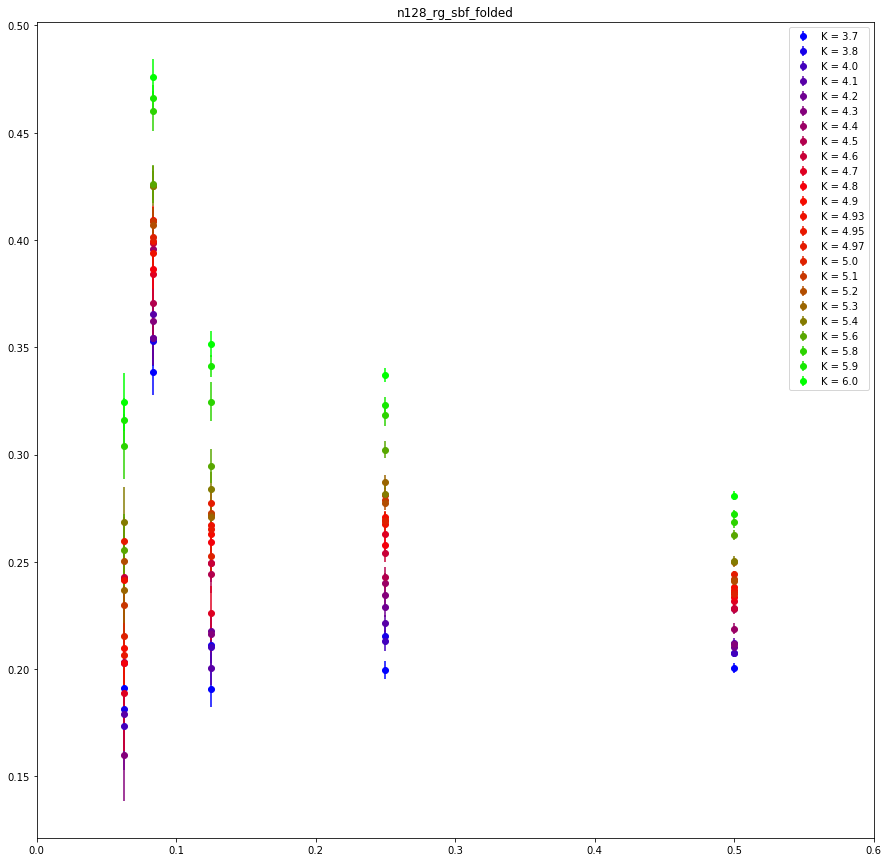

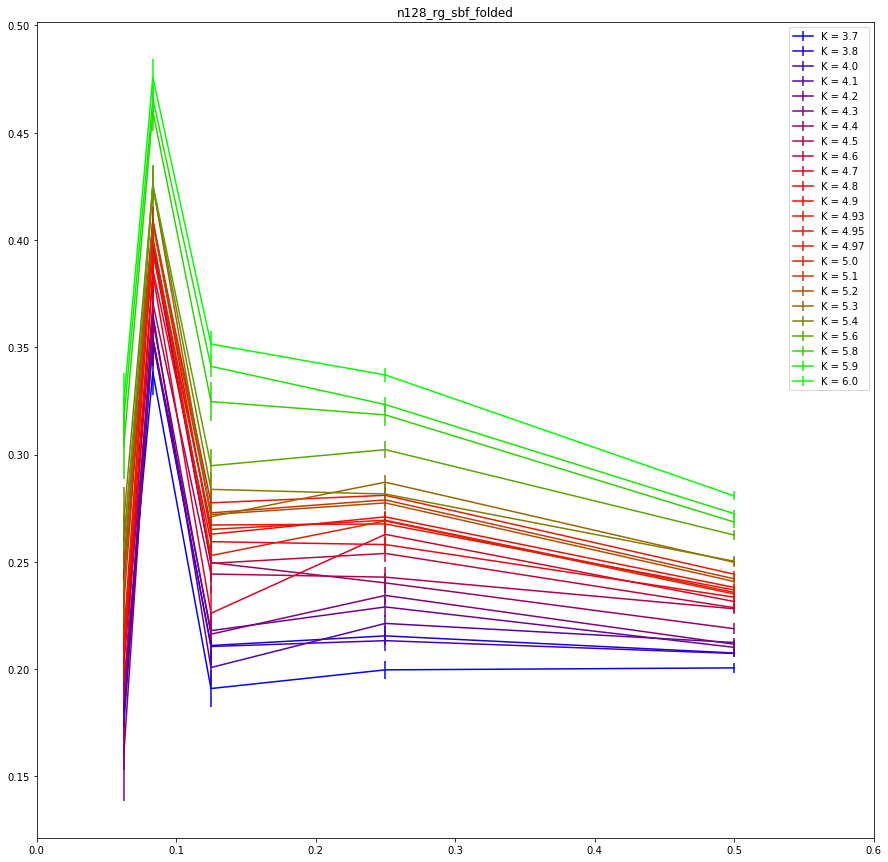

In [83]:
idx=0
plt.figure(figsize=(15,15))
ma=max(extracted_data.keys())
mi=min(extracted_data.keys())
if ma-mi > 0    :
    factor=1/(ma-mi)
else:
    factor=0
for K in extracted_data.keys():
    idx+=1
    l=[1/x for x in extracted_data[K]['RGL']]
    E=[i*1 for i in extracted_data[K]['C4']]
    plt.errorbar(l,E,extracted_data[K]['C4_err'],fmt='o',label="K = "+str(K),c=cmap(factor*(K-mi)))
plt.title(tag_name)
plt.xlim([0,0.6])
plt.legend(loc=1)
# plt.savefig('../extracted_data/'+tag_name+'_binder_cumuls_scatter.png')

idx=0
plt.figure(figsize=(15,15))
ma=max(extracted_data.keys())
mi=min(extracted_data.keys())
if ma-mi > 0    :
    factor=1/(ma-mi)
else:
    factor=0
for K in extracted_data.keys():
    idx+=1
    l=[1/x for x in extracted_data[K]['RGL']]
    E=[i*1 for i in extracted_data[K]['C4']]
    plt.errorbar(l,E,extracted_data[K]['C4_err'],label="K = "+str(K),c=cmap(factor*(K-mi)))
plt.title(tag_name)
plt.xlim([0,0.6])
plt.legend(loc=1)
# plt.savefig('../extracted_data/'+tag_name+'_binder_cumuls_line.png')
# plt.ylim([9850,10000])

In [84]:
K_select=[4.7,5.2,6.0]

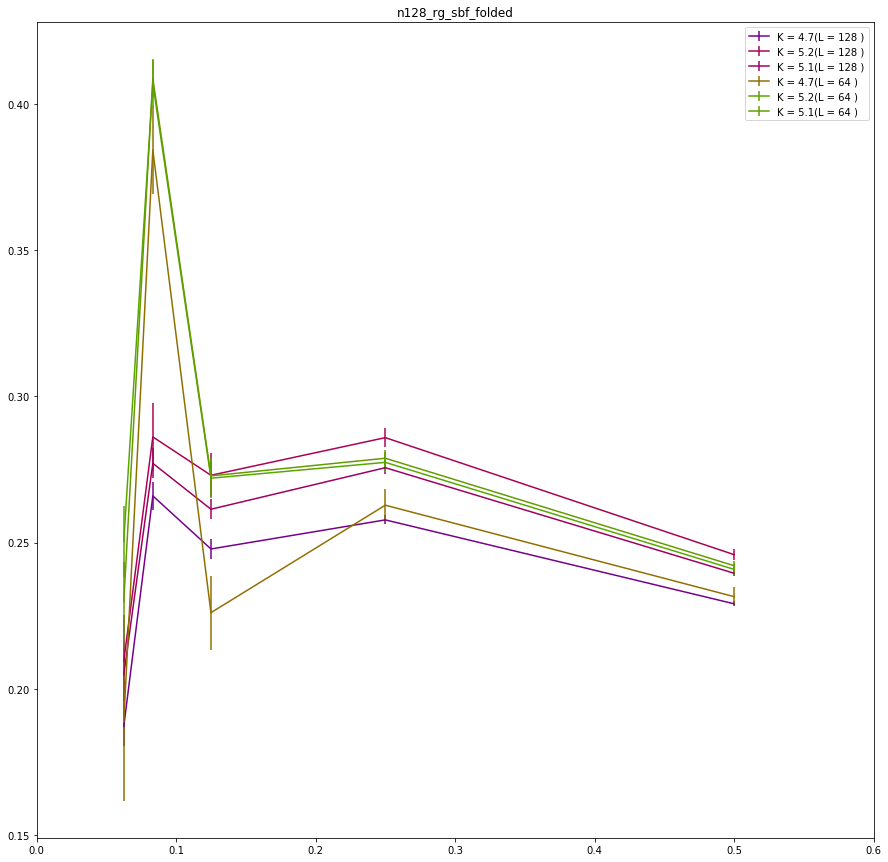

In [91]:
idx=0
# plt.figure(figsize=(15,15))
# ma=max(extracted_data.keys())
# mi=min(extracted_data.keys())
# if ma-mi > 0    :
#     factor=1/(ma-mi)
# else:
#     factor=0
# for K in K_select:
#     idx+=1
#     l=[1/x for x in extracted_data[K]['RGL']]
#     E=[i*1 for i in extracted_data[K]['C4']]
#     plt.errorbar(l,E,extracted_data[K]['C4_err'],fmt='o',label="K = "+str(K),c=cmap(factor*(K-mi)))
# plt.title(tag_name)
# plt.xlim([0,0.6])
# plt.legend(loc=1)
# plt.savefig('../extracted_data/'+tag_name+'_binder_cumuls_scatter.png')

idx=0
extracted_data=extracted_data128
plt.figure(figsize=(15,15))
ma=max(extracted_data.keys())
mi=min(extracted_data.keys())
if ma-mi > 0    :
    factor=1/(ma-mi)
else:
    factor=0
factor*=0.5
for K in K_select:
    idx+=1
    l=[1/x for x in extracted_data[K]['RGL']]
    E=[i*1 for i in extracted_data[K]['C4']]
    plt.errorbar(l,E,extracted_data[K]['C4_err'],label="K = "+str(K)+"(L = 128 )",c=cmap(factor*(K-mi)))
plt.title(tag_name)
plt.xlim([0,0.6])
plt.legend(loc=1)


idx=0
extracted_data=extracted_data64
# plt.figure(figsize=(15,15))
ma=max(extracted_data.keys())
mi=min(extracted_data.keys())
if ma-mi > 0    :
    factor=1/(ma-mi)
else:
    factor=0
factor*=0.5
for K in K_select:
    idx+=1
    l=[1/x for x in extracted_data[K]['RGL']]
    E=[i*1 for i in extracted_data[K]['C4']]
    plt.errorbar(l,E,extracted_data[K]['C4_err'],label="K = "+str(K)+"(L = 64 )",c=cmap(0.5+factor*(K-mi)))
plt.title(tag_name)
plt.xlim([0,0.6])
plt.legend(loc=1)
# plt.savefig('../extracted_data/'+tag_name+'_binder_cumuls_line.png')
# plt.ylim([9850,10000])

### ANALYZING THE BLOCK VARIABLE

In [93]:
tag_name

'n128_rg_sbf_folded'

In [92]:
f=open('../extracted_data/'+tag_name+"_cumulants",'w')
# f=open('junk','w')
cumulant=[]
L_lattice=64
# dat=get_data_moments(fnames[0])
MAG_TYPE='My'
f.write("K,RGL")
f.write(",C4,C4_err")
# f.write(",C6,C6_err")
f.write("\n")
Len=len(fnames)
i=0
s1_moments=[]
s1_moments_err=[]
k_vals=[]
for fn in fnames:
    i+=1
#     fn=fn.replace(".Rtxt",".txt")
    dat=get_data_moments(fn)
    rgc=dat['params']['RG ']
    if rgc==12:
        continue
    L=dat['params']['L ']
    L=64
    T=dat['params']['T ']
    J=dat['params']['J ']
    h4=dat['params']['h4 ']
    h8=dat['params']['h8 ']
    print(" Doing ",i," / ",Len ,"L : ",L,", T : ",T," J : ",J," h4 : ",h4," h8 : ",h8)
    k_vals.append(J)
    m,m_err=jacknife(dat[MAG_TYPE+'_s1'],Average)
    s1_moments.append(m*rgc**2/L**2)
    s1_moments_err.append(m_err*rgc**2/L**2)
    f.write(str(dat['params']['J '])+","+str(dat['params']['RG '])+",")
    print("m1 : ",m,"  +/- ",m_err,"   rgc : ",rgc)
#     f.write(str(c)+","+str(c_err)+",")
#     for s2,s4,s6 in zip(dat[MAG_TYPE+'_s2'],dat[MAG_TYPE+'_s4'],dat[MAG_TYPE+'_s6']):
#         cumulant.append(1-s4/(2*s2**2) +s6/(30*s2**3))
#     c,c_err=jacknife(cumulant,Average)
#     print("cumulant : ",c,"  +/- ",c_err,"\n")
#     f.write(str(c)+","+str(c_err))
    f.write("\n")
f.close()

 Doing  1  /  110 L :  64 , T :  1.0  J :  3.6  h4 :  0.06  h8 :  0.15
m1 :  -1.9766525886075952   +/-  3.888814945072969    rgc :  2.0
 Doing  2  /  110 L :  64 , T :  1.0  J :  3.6  h4 :  0.06  h8 :  0.15
m1 :  -0.49416276962025335   +/-  0.9722038995518875    rgc :  4.0
 Doing  3  /  110 L :  64 , T :  1.0  J :  3.6  h4 :  0.06  h8 :  0.15
m1 :  -0.12354046772151897   +/-  0.24305093806116285    rgc :  8.0
 Doing  5  /  110 L :  64 , T :  1.0  J :  3.6  h4 :  0.06  h8 :  0.15
m1 :  -0.03088511886075948   +/-  0.060762741582756206    rgc :  16.0
 Doing  6  /  110 L :  64 , T :  1.0  J :  3.7  h4 :  0.06  h8 :  0.15
m1 :  3.9210872956521747   +/-  5.518341157808615    rgc :  2.0
 Doing  7  /  110 L :  64 , T :  1.0  J :  3.7  h4 :  0.06  h8 :  0.15
m1 :  0.9802723234782607   +/-  1.379585712589755    rgc :  4.0
 Doing  8  /  110 L :  64 , T :  1.0  J :  3.7  h4 :  0.06  h8 :  0.15
m1 :  0.24506846000000007   +/-  0.3448963773668546    rgc :  8.0
 Doing  10  /  110 L :  64 , T :  1.0  

 Doing  108  /  110 L :  64 , T :  1.0  J :  6.0  h4 :  0.06  h8 :  0.15
m1 :  -0.21346921875000005   +/-  1.0178392466006358    rgc :  8.0
 Doing  110  /  110 L :  64 , T :  1.0  J :  6.0  h4 :  0.06  h8 :  0.15
m1 :  -0.05336850156250002   +/-  0.2544598376544099    rgc :  16.0


<Container object of 3 artists>

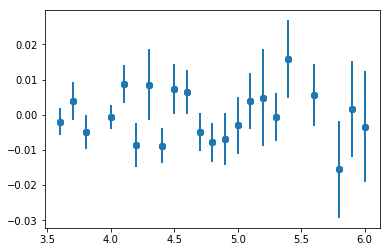

In [94]:
plt.errorbar(k_vals,s1_moments,s1_moments_err,fmt='o')

### MAKING MOMENT EXPECTATION FIRAT AND THEN FINDING CUMULANT

In [56]:
tag_name='n64_rg_sbf_folded'
# tag_name='n128_rg_sbf_folded'
f=open('../extracted_data/'+tag_name+"_cumulants_mexpec",'w')
cumulant=[]
L_lattice=64
# dat=get_data_moments(fnames[0])
MAG_TYPE='My'
f.write("K,RGL")
f.write(",C4,C4_err")
# f.write(",C6,C6_err")
f.write("\n")
Len=len(fnames)
i=0
for fn in fnames:
    i+=1
#     fn=fn.replace(".Rtxt",".txt")
    dat=get_data_moments(fn)
    rgc=dat['params']['RG ']
    if rgc==12:
        continue
    L=dat['params']['L ']
    L=64
    T=dat['params']['T ']
    J=dat['params']['J ']
    h4=dat['params']['h4 ']
    h8=dat['params']['h8 ']
    print(" Doing ",i," / ",Len ,"L : ",L,", T : ",T," J : ",J," h4 : ",h4," h8 : ",h8)
    f.write(str(dat['params']['J '])+","+str(dat['params']['RG '])+",")
    cumulant.clear()
    s2,s2_err=jacknife(dat[MAG_TYPE+'_s2'],Average)
    s4,s4_err=jacknife(dat[MAG_TYPE+'_s4'],Average)
    c=(1-s4*L*L/(3*rgc*rgc*(s2**2)))
    c_err=0
    print("cumulant : ",c,"  +/- ",c_err,"   rgc : ",rgc)
    f.write(str(c)+","+str(c_err)+",")
    cumulant.clear()
#     for s2,s4,s6 in zip(dat[MAG_TYPE+'_s2'],dat[MAG_TYPE+'_s4'],dat[MAG_TYPE+'_s6']):
#         cumulant.append(1-s4/(2*s2**2) +s6/(30*s2**3))
#     c,c_err=jacknife(cumulant,Average)
#     print("cumulant : ",c,"  +/- ",c_err,"\n")
#     f.write(str(c)+","+str(c_err))
    f.write("\n")
f.close()

 Doing  1  /  110 L :  64 , T :  1.0  J :  3.6  h4 :  0.06  h8 :  0.15
cumulant :  0.7992301159296655   +/-  0    rgc :  2.0
 Doing  2  /  110 L :  64 , T :  1.0  J :  3.6  h4 :  0.06  h8 :  0.15
cumulant :  0.7997408628165877   +/-  0    rgc :  4.0
 Doing  3  /  110 L :  64 , T :  1.0  J :  3.6  h4 :  0.06  h8 :  0.15
cumulant :  0.7956359191236226   +/-  0    rgc :  8.0
 Doing  5  /  110 L :  64 , T :  1.0  J :  3.6  h4 :  0.06  h8 :  0.15
cumulant :  0.777668874284104   +/-  0    rgc :  16.0
 Doing  6  /  110 L :  64 , T :  1.0  J :  3.7  h4 :  0.06  h8 :  0.15
cumulant :  0.7994002323527957   +/-  0    rgc :  2.0
 Doing  7  /  110 L :  64 , T :  1.0  J :  3.7  h4 :  0.06  h8 :  0.15
cumulant :  0.8000033448462587   +/-  0    rgc :  4.0
 Doing  8  /  110 L :  64 , T :  1.0  J :  3.7  h4 :  0.06  h8 :  0.15
cumulant :  0.7959136089378802   +/-  0    rgc :  8.0
 Doing  10  /  110 L :  64 , T :  1.0  J :  3.7  h4 :  0.06  h8 :  0.15
cumulant :  0.7716184387364353   +/-  0    rgc :  16.

 Doing  108  /  110 L :  64 , T :  1.0  J :  6.0  h4 :  0.06  h8 :  0.15
cumulant :  0.8355830005881643   +/-  0    rgc :  8.0
 Doing  110  /  110 L :  64 , T :  1.0  J :  6.0  h4 :  0.06  h8 :  0.15
cumulant :  0.8226577966758805   +/-  0    rgc :  16.0


### Reading the extracted Data

In [39]:
# tag_name='n64_rg_sbf_folded'
# tag_name='n128_rg_sbf_folded'
f=open("../extracted_data/"+tag_name+"_cumulants_mexpec",'r')
# f=open("../extracted_data/N64_RG_full_cumulants",'r')
l=f.readline()
item_list=l[:-1].split(",")
item_list.pop(0)
the_dict={i:[] for i in item_list}
extracted_data=dict()
l=f.readline()
# print(item_list)
# print(list(the_dict.keys()))
while l:
    item=l[:-1].split(",")
#     print(l[:-1])
    K=float(item.pop(0))
    if K not in extracted_data.keys():
        extracted_data.update({K:{ilk:[] for ilk in item_list}})
    for i,j in zip(the_dict.keys(),item):
#         print("adding ",j," to [",K," , ",i,"]")
        extracted_data[K][i].append(float(j))
    l=f.readline()
f.close()

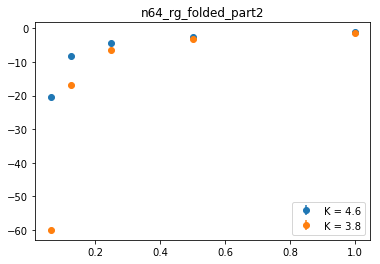

In [18]:
K=4.6
l=[1/x for x in extracted_data[K]['RGL']]
E=[i*1 for i in extracted_data[K]['C4']]
plt.errorbar(l,E,extracted_data[K]['C4_err'],fmt='o',label="K = "+str(K))

K=3.8
l=[1/x for x in extracted_data[K]['RGL']]
E=[i*1 for i in extracted_data[K]['C4']]
plt.errorbar(l,E,extracted_data[K]['C4_err'],fmt='o',label="K = "+str(K))

plt.title(tag_name)
plt.legend(loc=0)
# plt.ylim([9850,10000])

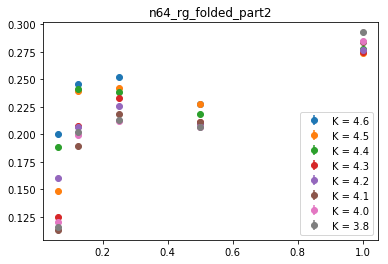

In [13]:
idx=0
for K in extracted_data.keys():
    idx+=1
#     if idx<3:
#         continue
    l=[1/x for x in extracted_data[K]['RGL']]
    E=[i*1 for i in extracted_data[K]['C4']]
    plt.errorbar(l,E,extracted_data[K]['C4_err'],fmt='o',label="K = "+str(K))
plt.title(tag_name)
plt.legend(loc=0)
# plt.ylim([9850,10000])